Phase 2 Project

Members: Deric Williamson & Eric Cusick

Instructor: Yish Lim

Date: 11/29/20

## Introduction

The goal of this project is to create an accurate dataset from the "kc_house_data.csv" file by using predictor models. 


The model will focus on homes in the price range of 150,000 to 710,000 dollars.

## Importing and Cleaning Data

In this step, we will import the raw data from the kc_house_data.csv.   
In our initial look, we will dive into the column types, missing data,  
and duplicate entries.

Once we fix any error the raw data might cause, we will export the 'cleaned'  
data onto a different .csv file for future work.

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_theme(style='darkgrid')

from IPython.display import display
pd.set_option('display.max_columns', None)

In [2]:
#importing csv to dataframe
df = pd.read_csv('data\kc_house_data.csv')

>importing the raw data from 'data\kc_house_data.csv' file

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  float64
 9   view           21534 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

> After importing the raw data, our first observation reveals that we are missing values in 'waterfront', 'view', and 'yr_renovated'. 

>The columns 'price', 'waterfront', 'view', 'yr_renovated' are all floats and 'sqft_basement' is a string all opposed to being integers that we can work with.

In [4]:
#filling the nan's with 0, all is categorical columns with the mode being 0.0
df['waterfront'] = df['waterfront'].fillna(0.0)
df['view'] = df['view'].fillna(0.0)
df['yr_renovated'] = df['yr_renovated'].fillna(0.0)

df.loc[df['sqft_basement'] == '?'] = 0
df['sqft_basement'] = df['sqft_basement'].astype(float).astype(int)

In [5]:
#changing columns from float to int
col_floats = ['price', 'waterfront', 'view', 'yr_renovated']
for col in col_floats:
    df[col] = df[col].astype(int)

In [6]:
#expanding the date column to a column for each month and year
df['date'] = pd.to_datetime(df['date'])
df['month_sold'] = df['date'].dt.month
df['year_sold'] = df['date'].dt.year

In [7]:
#creating seasonal columns
df['sold_spring_time'] = df['month_sold'] < 4
df['sold_summer_time'] = (df['month_sold'] > 3) & (df['month_sold'] < 7)
df['sold_fall_time'] = (df['month_sold'] > 6) & (df['month_sold'] < 10)
df['sold_winter_time'] = (df['month_sold'] > 9) & (df['month_sold'] < 13)

df['sold_spring_time'] = df['sold_spring_time'].astype(bool).astype(int)
df['sold_summer_time'] = df['sold_summer_time'].astype(bool).astype(int)
df['sold_fall_time'] = df['sold_fall_time'].astype(bool).astype(int)
df['sold_winter_time'] = df['sold_winter_time'].astype(bool).astype(int)

In [8]:
#converting 'yr_renovated' and 'sqft_basement' into a boolean
df['has_renovated'] = df['yr_renovated'].astype(bool).astype(int)
df['has_basement'] = df['sqft_basement'].astype(bool).astype(int)

In [9]:
#deleting columns not neccesary in dataframe
df.drop('date', axis=1, inplace=True)
df.drop('id', axis=1, inplace=True)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 27 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   price             21597 non-null  int32  
 1   bedrooms          21597 non-null  int64  
 2   bathrooms         21597 non-null  float64
 3   sqft_living       21597 non-null  int64  
 4   sqft_lot          21597 non-null  int64  
 5   floors            21597 non-null  float64
 6   waterfront        21597 non-null  int32  
 7   view              21597 non-null  int32  
 8   condition         21597 non-null  int64  
 9   grade             21597 non-null  int64  
 10  sqft_above        21597 non-null  int64  
 11  sqft_basement     21597 non-null  int32  
 12  yr_built          21597 non-null  int64  
 13  yr_renovated      21597 non-null  int32  
 14  zipcode           21597 non-null  int64  
 15  lat               21597 non-null  float64
 16  long              21597 non-null  float6

> the above table verifies that the data set is voided of any missing data.

> there are changes the data types on some of the columns to prep for work.


> Side note: we did also check for duplicated rows that leads to redundancies.


In [11]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,month_sold,year_sold,sold_spring_time,sold_summer_time,sold_fall_time,sold_winter_time,has_renovated,has_basement
0,221900,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,10,2014,0,0,0,1,0,0
1,538000,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,12,2014,0,0,0,1,1,1
2,180000,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062,2,2015,1,0,0,0,0,0
3,604000,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,12,2014,0,0,0,1,0,1
4,510000,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,2,2015,1,0,0,0,0,0


> After cleaning the raw data, a new .csv file was created to act as a save point.

> This new .csv file is the same as the original except with the missing data being filled and data types being changed  appropriately.

In [12]:
# exports a clean version of raw data.
df.to_csv('data\Cleaned_raw_kc_house_data.csv')

## EDA and Scrubbing

In this step of the process, we will look into every column  
for any outliers and/or any other odd extremities.

This step is a huge factor when it comes down to the "fit"  
or accuracy of our model

This is also where we start making decisions on what kind of data  
should belong into our model.

### price

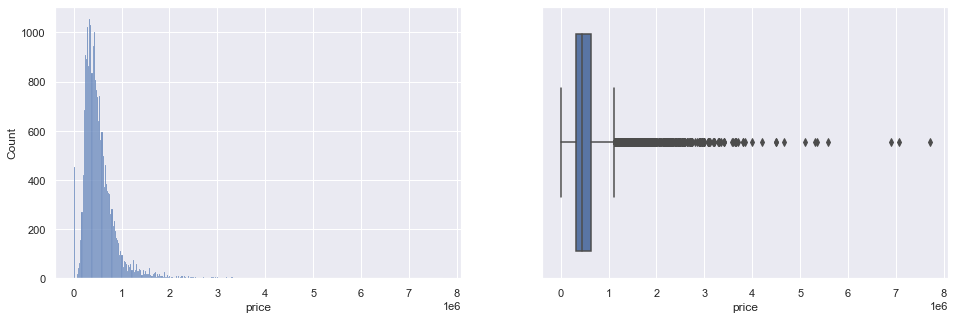

In [13]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16,5))

#looking for potential outliers
sns.histplot(data=df, x='price', ax = ax[0])
sns.boxplot(data=df, x='price', ax=ax[1]);

In [14]:
#Making the 'price' benchmark between $150,000 to $710,000
df.drop(df[df['price'] > 710000].index, inplace = True)
df.drop(df[df['price'] < 150000].index, inplace = True)

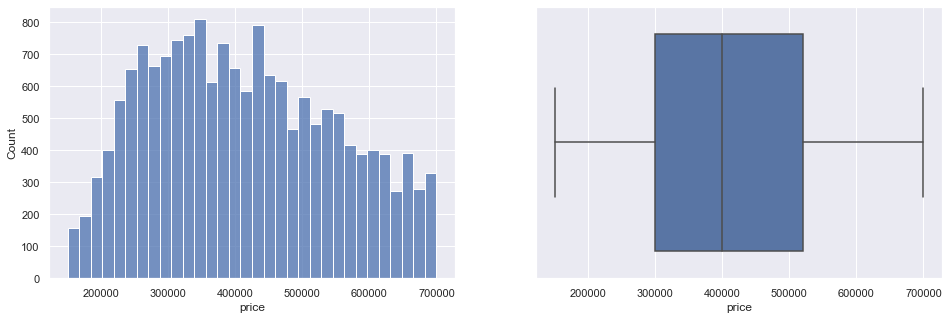

In [15]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16,5))

sns.histplot(data=df, x='price', ax = ax[0])
sns.boxplot(data=df, x='price', ax=ax[1]);

>The histogram and boxplot looks to be more normally distributed after removing outliers

### bedrooms

In [16]:
df['bedrooms'].value_counts()

3     8399
4     4633
2     2464
5      900
1      170
6      148
7       17
8        7
9        3
10       2
11       1
33       1
Name: bedrooms, dtype: int64

>the table above points out the outliers in our data set on how many bedrooms each house have

In [17]:
df.drop(df[df['bedrooms'] > 6].index, inplace = True)

In [18]:
df['bedrooms'].value_counts()

3    8399
4    4633
2    2464
5     900
1     170
6     148
Name: bedrooms, dtype: int64

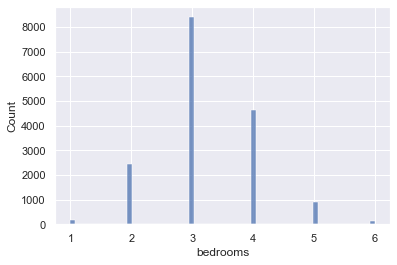

In [19]:
sns.histplot(data = df, x='bedrooms');

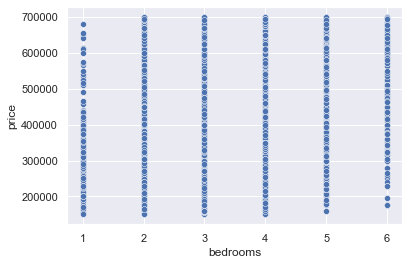

In [20]:
sns.scatterplot(x='bedrooms', y='price', data=df);

### bathrooms

In [21]:
df['bathrooms'].value_counts()

2.50    4101
1.00    3501
1.75    2703
2.00    1682
2.25    1654
1.50    1294
2.75     723
3.00     448
3.50     252
3.25     212
0.75      62
3.75      25
4.00      19
4.50      16
1.25       7
4.25       6
5.00       3
4.75       2
0.50       2
5.25       2
Name: bathrooms, dtype: int64

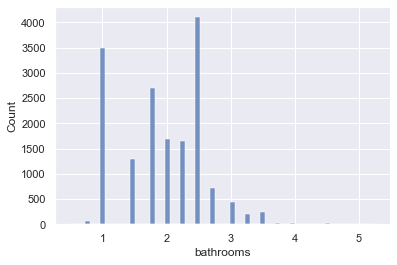

In [22]:
sns.histplot(data=df, x = 'bathrooms');

> the above table points out the outliers in our data-set on how many bathrooms each house in set have

In [23]:
df.drop(df[df['bathrooms'] > 4].index, inplace = True)
df.drop(df[df['bathrooms'] < 0.75].index, inplace = True)

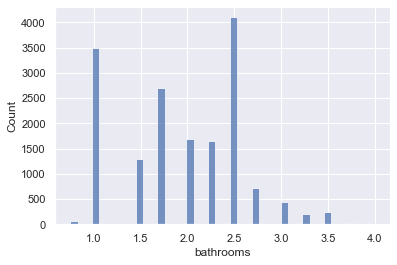

In [24]:
sns.histplot(data=df, x = 'bathrooms');

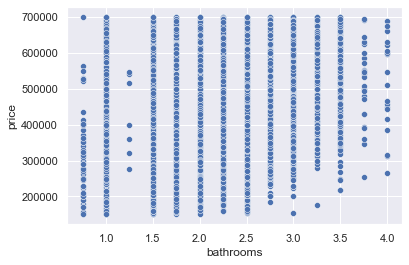

In [25]:
sns.scatterplot(x='bathrooms', y='price', data=df);

### sqft_living

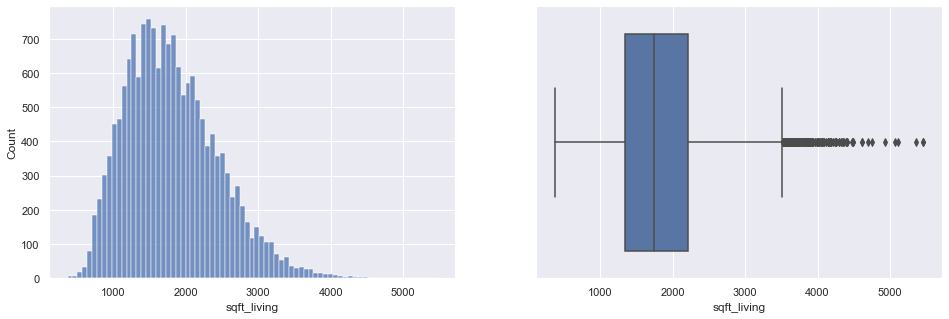

In [26]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16,5))

sns.histplot(data=df, x='sqft_living', ax = ax[0])
sns.boxplot(data=df, x='sqft_living', ax=ax[1]);

In [27]:
df.drop(df[df['sqft_living'] > 4500].index, inplace = True)

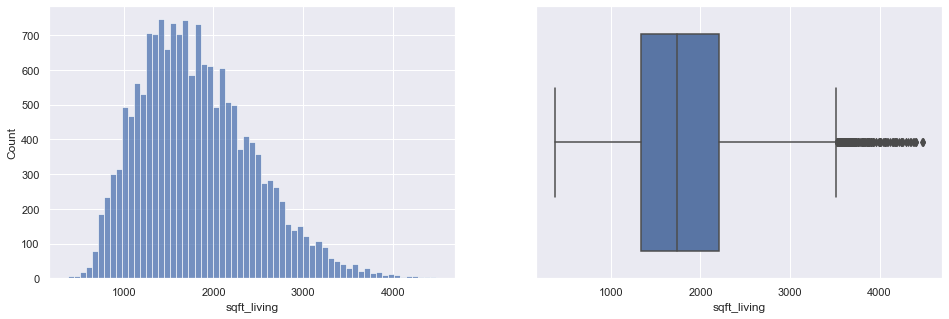

In [28]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16,5))

sns.histplot(data=df, x='sqft_living', ax = ax[0])
sns.boxplot(data=df, x='sqft_living', ax=ax[1]);

C:\Users\epcus\anaconda3\envs\learn-env\lib\site-packages\numpy\linalg\linalg.py:1965: RuntimeWarning: invalid value encountered in greater
  large = s > cutoff


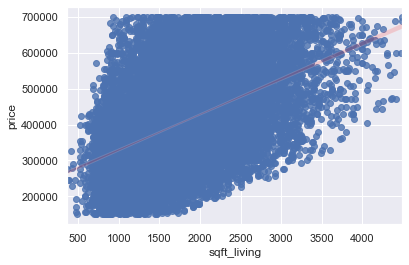

In [29]:
sns.regplot(x='sqft_living', y='price', data=df, line_kws={"color":"red"});

### sqft_lot

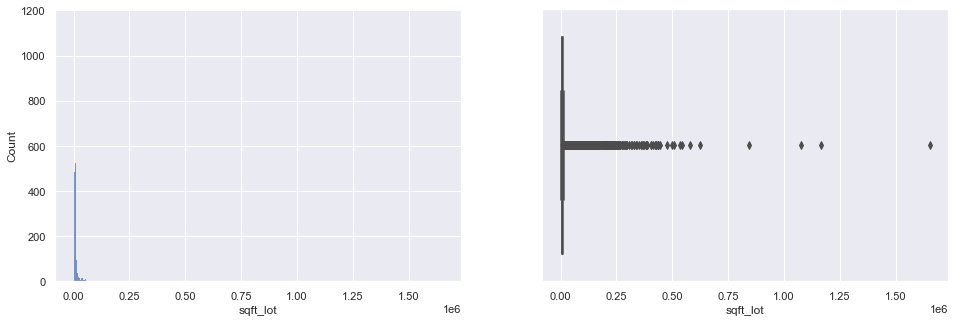

In [30]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16,5))

sns.histplot(data=df, x='sqft_lot', ax = ax[0])
sns.boxplot(data=df, x='sqft_lot', ax=ax[1]);

In [31]:
#df.drop(df[df['sqft_lot'] > 17500].index, inplace = True)
df.drop(df[df['sqft_lot'] > 14000].index, inplace = True)

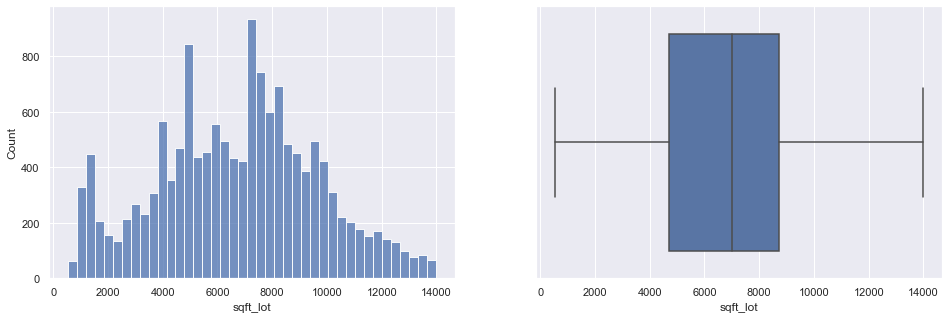

In [32]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16,5))

sns.histplot(data=df, x='sqft_lot', ax = ax[0])
sns.boxplot(data=df, x='sqft_lot', ax=ax[1]);

In [33]:
df['sqft_lot'].describe()

count    14423.000000
mean      6731.424114
std       2950.531104
min        520.000000
25%       4686.000000
50%       6992.000000
75%       8720.000000
max      14000.000000
Name: sqft_lot, dtype: float64

C:\Users\epcus\anaconda3\envs\learn-env\lib\site-packages\numpy\linalg\linalg.py:1965: RuntimeWarning: invalid value encountered in greater
  large = s > cutoff


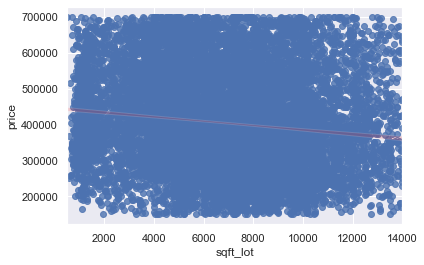

In [34]:
sns.regplot(x='sqft_lot', y='price', data=df, line_kws={"color":"red"});

> There is a negative trend between the size of the lot compared to the value of the house

### sqft_basement

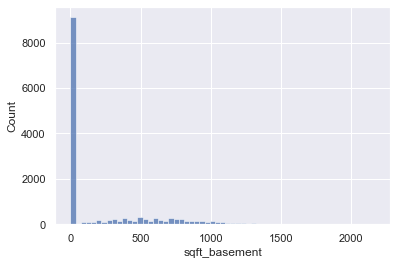

In [35]:
sns.histplot(data=df, x='sqft_basement');

In [36]:
df.drop(df[df['sqft_basement'] > 1300].index, inplace=True)

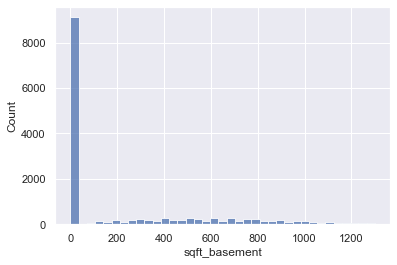

In [37]:
sns.histplot(data = df, x='sqft_basement');

#### has_basement

Ended up turning the 'sqft_basement' column into a boolean value due to being a significant number of homes that does not have a basement

In [38]:
df['has_basement'].describe()

count    14290.000000
mean         0.362071
std          0.480616
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          1.000000
Name: has_basement, dtype: float64

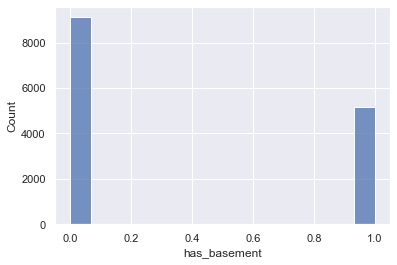

In [39]:
sns.histplot(data = df, x='has_basement');

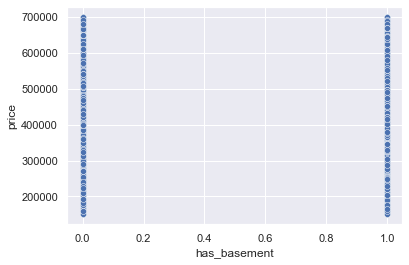

In [40]:
sns.scatterplot(data=df, x='has_basement', y='price');

### floors

In [41]:
df['floors'].value_counts()

1.0    7758
2.0    4781
1.5    1207
3.0     481
2.5      57
3.5       6
Name: floors, dtype: int64

In [42]:
df.drop(df[df['floors'] > 3].index, inplace=True)

In [43]:
df['floors'].value_counts()

1.0    7758
2.0    4781
1.5    1207
3.0     481
2.5      57
Name: floors, dtype: int64

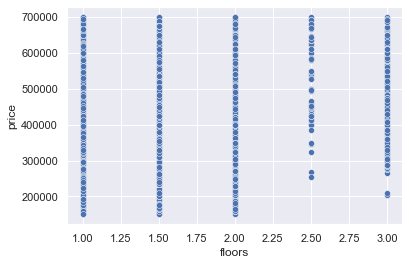

In [44]:
sns.scatterplot(data=df, x='floors', y='price');

### grade and condition

The grade is representing the construction quality of the house ranging from average homes up to mansions level. While the condition is more self-explanatory meaning the condition quality of the house, as in is it well kept?

In [45]:
df['grade'].value_counts()

7     7414
8     4051
6     1689
9      869
5      145
10     103
4       10
11       2
3        1
Name: grade, dtype: int64

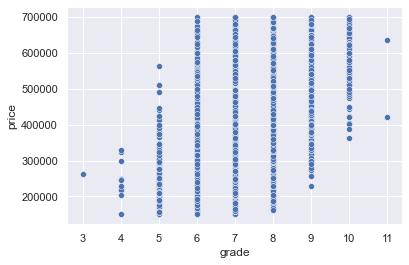

In [46]:
sns.scatterplot(data=df, x='grade', y='price');

In [47]:
df['condition'].value_counts()

3    9420
4    3700
5    1044
2     107
1      13
Name: condition, dtype: int64

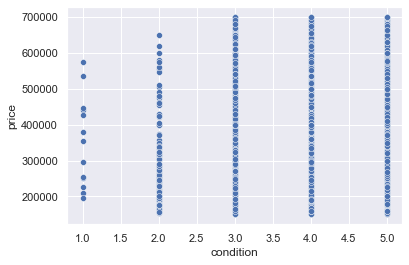

In [48]:
sns.scatterplot(data=df, x='condition', y='price');

### sqft_lot15

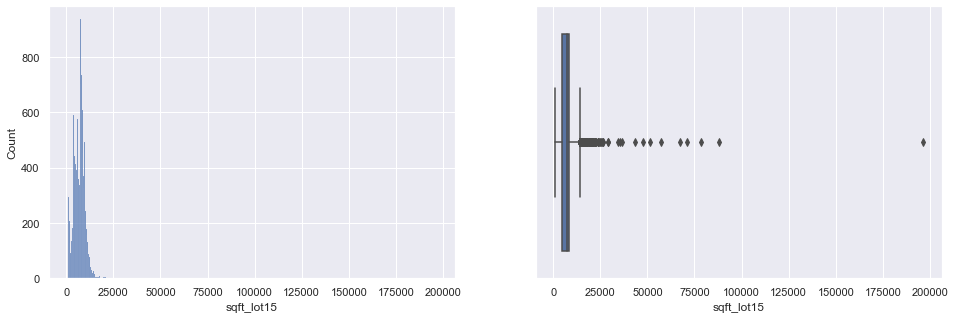

In [49]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16,5))

sns.histplot(data=df, x='sqft_lot15', ax = ax[0])
sns.boxplot(data=df, x='sqft_lot15', ax=ax[1]);

In [50]:
df.drop(df[df['sqft_lot15'] > 25000].index, inplace=True)

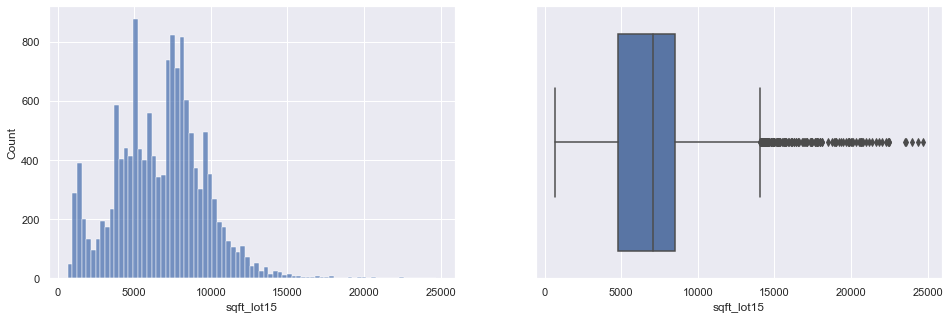

In [51]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16,5))

sns.histplot(data=df, x='sqft_lot15', ax = ax[0])
sns.boxplot(data=df, x='sqft_lot15', ax=ax[1]);

C:\Users\epcus\anaconda3\envs\learn-env\lib\site-packages\numpy\linalg\linalg.py:1965: RuntimeWarning: invalid value encountered in greater
  large = s > cutoff


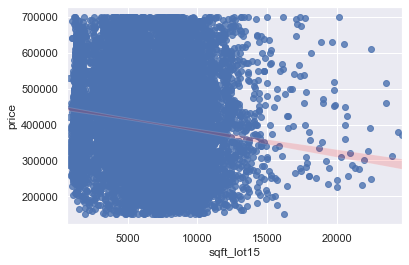

In [52]:
sns.regplot(x='sqft_lot15', y='price', data=df, line_kws={"color":"red"});

### sqft_living15

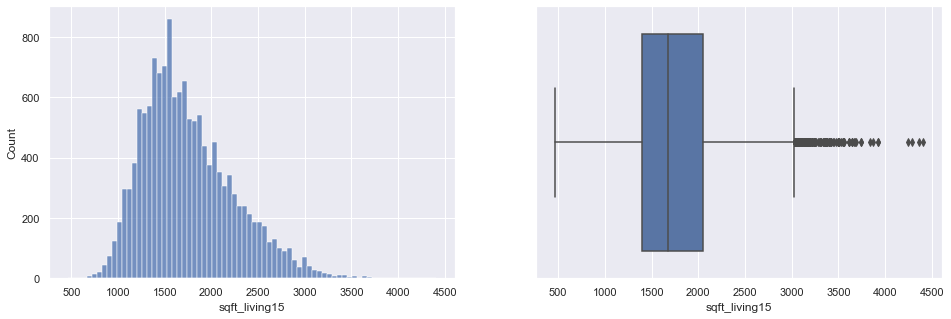

In [53]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16,5))

sns.histplot(data=df, x='sqft_living15', ax = ax[0])
sns.boxplot(data=df, x='sqft_living15', ax=ax[1]);

C:\Users\epcus\anaconda3\envs\learn-env\lib\site-packages\numpy\linalg\linalg.py:1965: RuntimeWarning: invalid value encountered in greater
  large = s > cutoff


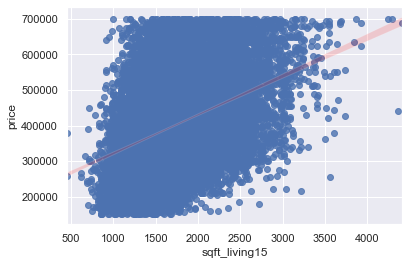

In [54]:
sns.regplot(x='sqft_living15', y='price', data=df, line_kws={"color":"red"});

### date

In [55]:
df['year_sold'].value_counts()

2014    9623
2015    4643
Name: year_sold, dtype: int64

> deleting year_sold for not having a variety of years being sold.

In [56]:
df.drop('year_sold', axis=1, inplace=True)

### waterfront

In [57]:
df['waterfront'].value_counts()

0    14259
1        7
Name: waterfront, dtype: int64

Dropping 'waterfront' column as there is almost no waterfront home in this modify dataset after adjusting the price range

In [58]:
df.drop('waterfront', axis=1, inplace=True)

### view

In [59]:
df['view'].value_counts()

0    13617
2      368
1      137
3      121
4       23
Name: view, dtype: int64

### zipcode

In [60]:
# zipcode count
frequency = df.groupby('zipcode')['price'].count()

In [61]:
#avg price per zipcode
mean = df.groupby('zipcode').mean()['price']

In [62]:
#new df
cluster = pd.concat([frequency, mean], axis=1)

In [63]:
cluster['zipcode'] = cluster.index

In [64]:
cluster.columns = ['frequency','price', 'zipcode']
cluster.describe()

,frequency,price,zipcode
count,69.000000,69.000000,69.000000
mean,206.753623,417369.728698,98077.855072
std,126.522772,112392.001350,56.845062
min,16.000000,237994.197740,98001.000000
25%,114.000000,305616.090909,98029.000000
50%,208.000000,421660.602564,98070.000000
75%,262.000000,509945.699758,98118.000000
max,465.000000,630238.461538,98199.000000


In [65]:
# creating "cheap" group that sell below mean price(454585)
cluster_cheap = cluster[cluster.price < 454585]

# temporary cluster of the houses that sell above mean price
cluster_temp = cluster[cluster.price >= 454585]

# creating "low volume, higher priced" group that sell less frequently than the mean
cluster_cheap_low_volume = cluster_cheap[cluster_cheap.frequency < 330]

# creating "high volume, higher priced" group that sell more frequently than the mean
cluster_cheap_high_volume = cluster_cheap[cluster_cheap.frequency >= 330]

# creating "low volume, higher priced" group that sell less frequently than the mean
cluster_expensive_low_volume = cluster_temp[cluster_temp.frequency < 278]

# creating "high volume, higher priced" group that sell more frequently than the mean
cluster_expensive_high_volume = cluster_temp[cluster_temp.frequency >= 280]

In [66]:
def get_zipcode_category(zipcode):
    # returns category from clusters
    if zipcode in cluster_cheap_low_volume.index:
        return 'cheap_low_volume'
    elif zipcode in cluster_cheap_high_volume.index:
        return 'cheap_high_volume'
    elif zipcode in cluster_expensive_low_volume.index:
        return 'expensive_low_volume'
    else:
        return 'expensive_high_volume'

In [67]:
# applying function and returning to a new column 'zipcode type'
df['zipcode_type'] = df.zipcode.apply(get_zipcode_category)

# viewing how our clusters look
df.zipcode_type.value_counts()


cheap_low_volume         4921
cheap_high_volume        4036
expensive_low_volume     3705
expensive_high_volume    1604
Name: zipcode_type, dtype: int64

## Continuous and Categorical Features

### Multicollinearity 

Checking the columns that contains continuous value for multicollinearity

In [68]:
df_cont = df[['sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement', 
              'lat', 'long', 'sqft_living15', 'sqft_lot15']]

data_cont = df_cont.corr().abs().stack().reset_index().sort_values(0, ascending=False)
data_cont['pairs'] = list(zip(data_cont.level_0, data_cont.level_1))
data_cont.set_index(['pairs'], inplace=True)
data_cont.drop(columns=['level_1', 'level_0'], inplace = True)
data_cont.columns = ['cc']
data_cont.drop_duplicates(inplace=True)
data_cont[(data_cont.cc>.70) & (data_cont.cc<1)]

,cc
pairs,
"(sqft_lot15, sqft_lot)",0.866087
"(sqft_above, sqft_living)",0.829038
"(sqft_living, sqft_living15)",0.710793


>Above table are showing some highly correlated continuous columns. We'll be dropping 'sqft_above', 'sqft_living15', and 'sqft_lot15' due to high correlation that will lead to fallacy in our model.

In [69]:
#creating seperate dataframe from the original to make the changes
df_b = df

In [70]:
#dropping the multicollinearies and unwanted columns
df_b.drop('lat', axis = 1, inplace = True)
df_b.drop('long', axis = 1, inplace = True)
df_b.drop('sqft_above', axis = 1, inplace = True)
df_b.drop('sqft_living15', axis = 1, inplace = True)
df_b.drop('sqft_lot15', axis = 1, inplace = True)

> We are dropping 'lat' and 'long' columns because we'll be utilizing zipcode instead. As well as dropping the 'view' columns because we believe it's not a big determining factor for house prices.

### Categorical / One Hot Encoded

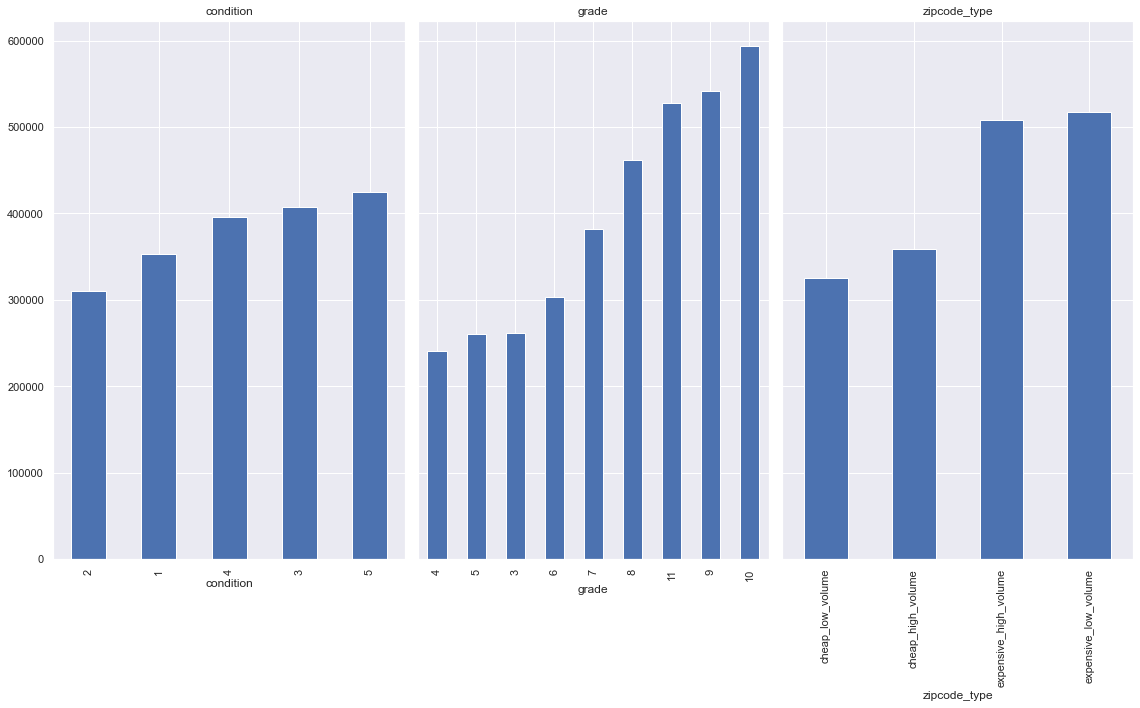

In [71]:
#looking at graphs to see columns shaped like a categorical data
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(16,10), sharey=True)

feats = ['condition', 'grade', 'zipcode_type']

for col, ax in zip(feats, axes.flatten()):
    (df.groupby(col)               
         .mean()['price']        
         .sort_values()              
         .plot
         .bar(ax=ax))                
    
    ax.set_title(col)                
fig.tight_layout()

In [72]:
features = df[feats].astype('category')

In [73]:
feats_ohe = pd.get_dummies(features, drop_first = True)

In [74]:
feats_ohe = feats_ohe.astype(int)

In [75]:
#Checking the head of the data to make sure OHE works
feats_ohe.head()

,condition_2,condition_3,condition_4,condition_5,grade_4,grade_5,grade_6,grade_7,grade_8,grade_9,grade_10,grade_11,zipcode_type_cheap_low_volume,zipcode_type_expensive_high_volume,zipcode_type_expensive_low_volume
0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0
1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0
2,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0
3,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1
4,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1


### Baseline DataFrame

Adding the new features and removing some columns to the baseline data

In [76]:
#Adding the new OHE columns
df_model = pd.concat([df_b, feats_ohe], axis = 1)

In [77]:
df_model.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'view', 'condition', 'grade', 'sqft_basement', 'yr_built',
       'yr_renovated', 'zipcode', 'month_sold', 'sold_spring_time',
       'sold_summer_time', 'sold_fall_time', 'sold_winter_time',
       'has_renovated', 'has_basement', 'zipcode_type', 'condition_2',
       'condition_3', 'condition_4', 'condition_5', 'grade_4', 'grade_5',
       'grade_6', 'grade_7', 'grade_8', 'grade_9', 'grade_10', 'grade_11',
       'zipcode_type_cheap_low_volume', 'zipcode_type_expensive_high_volume',
       'zipcode_type_expensive_low_volume'],
      dtype='object')

> Dropping more unwanted columns from our baseline DataFrame. Dropping 'view' because we feel like there isn't enough data to make a big difference to the model. Dropping 'yr_renovated' and 'sqft_basement' because we created a boolean versions of these columns. And dropping the 'sqft_lot' because looking at the graphs back in the scrubbing phase, there isn't really any impact on the price. This may be due to a lot of valuable homes being in Seattle city having little or no lots

In [78]:
#dropping unwanted columns first
df_model.drop('view', axis = 1, inplace = True)
df_model.drop('yr_renovated', axis = 1, inplace = True)
df_model.drop('sqft_basement', axis = 1, inplace = True)
df_model.drop('sqft_lot', axis = 1, inplace = True)


>Dropping 'condition', 'grade', and 'zipcode' since they're replaced with one hot encoded features

In [79]:
df_model.drop('condition', axis = 1, inplace = True)
df_model.drop('grade', axis = 1, inplace = True)
df_model.drop('zipcode', axis = 1, inplace = True)

In [80]:
df_model.drop('zipcode_type', axis = 1, inplace = True)

In [81]:
#checking to see the new dataset and ensuring that there is no missing values
df_model.head()

,price,bedrooms,bathrooms,sqft_living,floors,yr_built,month_sold,sold_spring_time,sold_summer_time,sold_fall_time,sold_winter_time,has_renovated,has_basement,condition_2,condition_3,condition_4,condition_5,grade_4,grade_5,grade_6,grade_7,grade_8,grade_9,grade_10,grade_11,zipcode_type_cheap_low_volume,zipcode_type_expensive_high_volume,zipcode_type_expensive_low_volume
0,221900,3,1.00,1180,1.0,1955,10,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0
1,538000,3,2.25,2570,2.0,1951,12,0,0,0,1,1,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0
2,180000,2,1.00,770,1.0,1933,2,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0
3,604000,4,3.00,1960,1.0,1965,12,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1
4,510000,3,2.00,1680,1.0,1987,2,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1


In [82]:
df_b.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14266 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   price             14266 non-null  int32  
 1   bedrooms          14266 non-null  int64  
 2   bathrooms         14266 non-null  float64
 3   sqft_living       14266 non-null  int64  
 4   sqft_lot          14266 non-null  int64  
 5   floors            14266 non-null  float64
 6   view              14266 non-null  int32  
 7   condition         14266 non-null  int64  
 8   grade             14266 non-null  int64  
 9   sqft_basement     14266 non-null  int32  
 10  yr_built          14266 non-null  int64  
 11  yr_renovated      14266 non-null  int32  
 12  zipcode           14266 non-null  int64  
 13  month_sold        14266 non-null  int64  
 14  sold_spring_time  14266 non-null  int32  
 15  sold_summer_time  14266 non-null  int32  
 16  sold_fall_time    14266 non-null  int32 

## First Model - Baseline


### Train-Test Split

We are doing the Train-Test Split to help make a predictive model.

In [83]:
#importing the necessary libraries for train-test split
import scipy.stats as stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

linreg = LinearRegression()

In [84]:
y = df_model[['price']]
X = df_model.drop(['price'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = (123))

In [85]:
linreg.fit(X_train, y_train)

y_hat_train = linreg.predict(X_train)
y_hat_test = linreg.predict(X_test)

In [86]:
rmse_train = np.sqrt(mean_squared_error(y_train, y_hat_train))
rmse_test = np.sqrt(mean_squared_error(y_test, y_hat_test))

In [87]:
print("RMSE Train:", round(rmse_train, 2))
print("RMSE Test:", round(rmse_test, 2))

RMSE Train: 80673.51
RMSE Test: 82371.36


###  model

In [88]:
from statsmodels.formula.api import ols

In [89]:
# Fitting the actual model
outcome = 'price'
x_cols = list(df_model.columns)
x_cols.remove('price')

data = pd.concat([X_train, y_train], axis = 1)

predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model = ols(formula=formula, data = data).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.649
Model:                            OLS   Adj. R-squared:                  0.648
Method:                 Least Squares   F-statistic:                     808.5
Date:                Wed, 25 Nov 2020   Prob (F-statistic):               0.00
Time:                        14:30:11   Log-Likelihood:            -1.4513e+05
No. Observations:               11412   AIC:                         2.903e+05
Df Residuals:                   11385   BIC:                         2.905e+05
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
Intercept                           1.955e+06   9.17e+04     21.311      0.000    1.78e+06    2.13e+06
bedrooms                           -6554.3070   1229.147     -5.332      0.000   -8963.648   -4144.966
bathrooms                           1.329e+04   2006.492      6.622      0.000    9353.775    1.72e+04
sqft_living                           72.4802      2.176     33.308      0.000      68.215      76.746
floors                              1.529e+04   1980.783      7.718      0.000    1.14e+04    1.92e+04
yr_built                           -1197.7171     40.822    -29.340      0.000   -1277.736   -1117.698
month_sold                         -1490.7353    930.490     -1.602      0.109   -3314.657     333.186
sold_spring_time                    4.863e+05   2.31e+04     21.016      0.000    4.41e+05    5.32e+05
sold_summer_time                    4.947e+05   2.29e+04     21.564      0.000     4.5e+05     5.4e+05
sold_fall_time                      4.863e+05   2.31e+04     21.070      0.000    4.41e+05    5.32e+05
sold_winter_time                    4.877e+05   2.35e+04     20.735      0.000    4.42e+05    5.34e+05
has_renovated                       3659.2635   5345.703      0.685      0.494   -6819.237    1.41e+04
has_basement                        1.762e+04   1806.151      9.753      0.000    1.41e+04    2.12e+04
condition_2                         2.802e+04    2.6e+04      1.080      0.280   -2.29e+04    7.89e+04
condition_3                         6.641e+04   2.44e+04      2.716      0.007    1.85e+04    1.14e+05
condition_4                         6.847e+04   2.45e+04      2.800      0.005    2.05e+04    1.16e+05
condition_5                         9.642e+04   2.46e+04      3.926      0.000    4.83e+04    1.45e+05
grade_4                            -2.003e+04   8.57e+04     -0.234      0.815   -1.88e+05    1.48e+05
grade_5                            -3.479e+04   8.12e+04     -0.428      0.668   -1.94e+05    1.24e+05
grade_6                              416.7531   8.09e+04      0.005      0.996   -1.58e+05    1.59e+05
grade_7                             4.587e+04   8.09e+04      0.567      0.571   -1.13e+05    2.04e+05
grade_8                             9.353e+04   8.09e+04      1.156      0.248   -6.51e+04    2.52e+05
grade_9                              1.52e+05    8.1e+04      1.876      0.061   -6827.608    3.11e+05
grade_10                            1.718e+05   8.14e+04      2.109      0.035    1.21e+04    3.31e+05
grade_11                            1.182e+05   9.91e+04      1.192      0.233   -7.61e+04    3.13e+05
zipcode_type_cheap_low_volume      -2.954e+04   1923.348    -15.358      0.000   -3.33e+04   -2.58e+04
zipcode_type_expensive_high_volume  1.394e+05   2834.207     49.201      0.000    1.34e+05    1.

>R-squared is at 0.65 and there is several significant p-values that needs to be taken care of.

### Checking QQ Plot

In [90]:
import statsmodels.api as sm

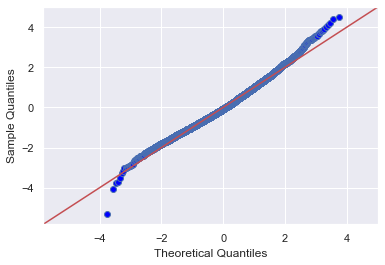

In [91]:
fig = sm.graphics.qqplot(model.resid, dist=stats.norm, line='45', fit=True)

>The line is looking pretty good overall, there is some impovement that can be made.

### Checking for Homoscedasticity

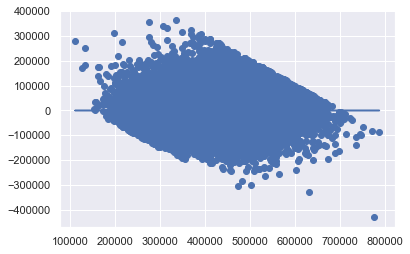

In [92]:
plt.scatter(model.predict(data[x_cols]), model.resid)
plt.plot(model.predict(data[x_cols]), [0 for i in range(len(data))]);

>The grouping looks decent aside from several outliers that are sticking out

## Second Model - Multicollinearies

### checking and fixing multicollinearies

In [93]:
#Importing variance inflation factor to check for multicollinearies 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [94]:
col = df_model[x_cols]
vif = [variance_inflation_factor(col.values, i) for i in range(col.shape[1])]
list(zip(x_cols, vif))

[('bedrooms', 1.7623706755241721),
 ('bathrooms', 3.0188825570644964),
 ('sqft_living', 2.94052969935436),
 ('floors', 2.043729957578428),
 ('yr_built', 2.5112617136511846),
 ('month_sold', 14.909233390511822),
 ('sold_spring_time', 4955.142494536105),
 ('sold_summer_time', 8000.275338985525),
 ('sold_fall_time', 7090.232201052827),
 ('sold_winter_time', 5798.992887234286),
 ('has_renovated', 1.0732303872444717),
 ('has_basement', 1.3222618994440674),
 ('condition_2', 9.03204489978114),
 ('condition_3', 248.4384693021677),
 ('condition_4', 212.42237827576454),
 ('condition_5', 75.6811886788581),
 ('grade_4', 11.008103944564066),
 ('grade_5', 143.75220696474557),
 ('grade_6', 1491.6434441542324),
 ('grade_7', 3570.187606132348),
 ('grade_8', 2909.6063788264037),
 ('grade_9', 818.2201005882912),
 ('grade_10', 103.67286055412318),
 ('grade_11', 3.009842330916232),
 ('zipcode_type_cheap_low_volume', 1.4639872200497381),
 ('zipcode_type_expensive_high_volume', 1.4056833473837071),
 ('zipcod

In [95]:
vif_scores = list(zip(x_cols, vif))
v_test = [x for x, vif in vif_scores if vif > 10]
print(len(vif_scores), len(v_test))

27 15


>There is 15 columns that have significant multicollineary with several others

In [96]:
v_test

['month_sold',
 'sold_spring_time',
 'sold_summer_time',
 'sold_fall_time',
 'sold_winter_time',
 'condition_3',
 'condition_4',
 'condition_5',
 'grade_4',
 'grade_5',
 'grade_6',
 'grade_7',
 'grade_8',
 'grade_9',
 'grade_10']

>Dropping those columns from the v_test and dropping the leftover condition and grade columns as there is only one left of it kind. Making it kinda useless without the other cat. values

In [97]:
for v in v_test:
    df_model.drop(v, axis=1, inplace=True)

In [98]:
df_model.drop('condition_2', axis = 1, inplace = True)
df_model.drop('grade_11', axis = 1, inplace = True)

In [99]:
#checking .info() to confirm the changes
df_model.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14266 entries, 0 to 21596
Data columns (total 11 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   price                               14266 non-null  int32  
 1   bedrooms                            14266 non-null  int64  
 2   bathrooms                           14266 non-null  float64
 3   sqft_living                         14266 non-null  int64  
 4   floors                              14266 non-null  float64
 5   yr_built                            14266 non-null  int64  
 6   has_renovated                       14266 non-null  int32  
 7   has_basement                        14266 non-null  int32  
 8   zipcode_type_cheap_low_volume       14266 non-null  int32  
 9   zipcode_type_expensive_high_volume  14266 non-null  int32  
 10  zipcode_type_expensive_low_volume   14266 non-null  int32  
dtypes: float64(2), int32(6), int64(3)
memory 

### Train-Test Split

In [100]:
y = df_model['price']
X = df_model.drop(['price'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = (123))

In [101]:
linreg.fit(X_train, y_train)

y_hat_train = linreg.predict(X_train)
y_hat_test = linreg.predict(X_test)

In [102]:
rmse_train = np.sqrt(mean_squared_error(y_train, y_hat_train))
rmse_test = np.sqrt(mean_squared_error(y_test, y_hat_test))

In [103]:
print("RMSE Train:", round(rmse_train, 2))
print("RMSE Test:", round(rmse_test, 2))

RMSE Train: 85765.33
RMSE Test: 86414.6


### model

In [104]:
x_cols = list(df_model.columns)
x_cols.remove('price')

data = pd.concat([X_train, y_train], axis = 1)

predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model = ols(formula=formula, data = data).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.603
Model:                            OLS   Adj. R-squared:                  0.603
Method:                 Least Squares   F-statistic:                     1731.
Date:                Wed, 25 Nov 2020   Prob (F-statistic):               0.00
Time:                        14:30:13   Log-Likelihood:            -1.4583e+05
No. Observations:               11412   AIC:                         2.917e+05
Df Residuals:                   11401   BIC:                         2.918e+05
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
Intercept                            1.82e+06   7.59e+04     23.970      0.000    1.67e+06    1.97e+06
bedrooms                           -1.125e+04   1283.149     -8.768      0.000   -1.38e+04   -8734.992
bathrooms                           1.753e+04   2109.101      8.311      0.000    1.34e+04    2.17e+04
sqft_living                          103.9322      2.087     49.790      0.000      99.841     108.024
floors                               2.17e+04   2054.251     10.564      0.000    1.77e+04    2.57e+04
yr_built                            -850.5075     39.468    -21.549      0.000    -927.872    -773.143
has_renovated                        869.4010   5631.583      0.154      0.877   -1.02e+04    1.19e+04
has_basement                        1.551e+04   1899.318      8.168      0.000    1.18e+04    1.92e+04
zipcode_type_cheap_low_volume      -3.228e+04   2037.069    -15.847      0.000   -3.63e+04   -2.83e+04
zipcode_type_expensive_high_volume  1.512e+05   2969.664     50.901      0.000    1.45e+05    1.57e+05
zipcode_type_expensive_low_volume    1.48e+05   2219.067     66.691      0.000    1.44e+05    1.52e+05
==============================================================================
Omnibus:                      293.862   Durbin-Watson:                   2.028
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              323.056
Skew:                           0.380   Prob(JB):                     7.07e-71
Kurtosis:                       3.320   Cond. No.                     2.52e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.52e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

> The R-squared dropped from 0.65 to 0.605 and the p-value are still there which will be taken out before the next model

### QQ Plot

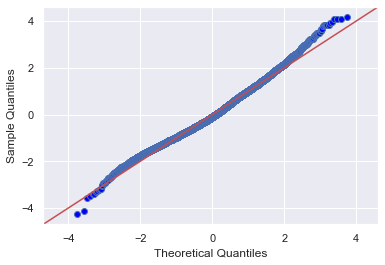

In [105]:
fig = sm.graphics.qqplot(model.resid, dist=stats.norm, line='45', fit=True)

>There is an impovement the line compared to the last qqplot

### Homoscedasticity

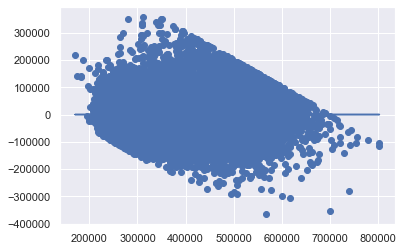

In [106]:
plt.scatter(model.predict(data[x_cols]), model.resid)
plt.plot(model.predict(data[x_cols]), [0 for i in range(len(data))]);

>Hard to tell if there is any change in the graph compared to the last

## Third Model - P_Values

### finding and fixing high p_values

In [107]:
# finding the high p values
summary = model.summary()
p_table = summary.tables[1]
p_table = pd.DataFrame(p_table.data)
p_table.columns = p_table.iloc[0]
p_table = p_table.drop(0)
p_table = p_table.set_index(p_table.columns[0])
p_table['P>|t|'] = p_table['P>|t|'].astype(float)

In [108]:
#showing the high p values
high_p_values = list(p_table[p_table['P>|t|'] >= 0.05].index)
print("Our high p_values columns:", high_p_values)

Our high p_values columns: ['has_renovated']


In [109]:
for col in high_p_values:
    df_model.drop(col, axis=1, inplace=True)

In [110]:
# leaving the high p values out.
x_cols = list(p_table[p_table['P>|t|'] < 0.05].index)
x_cols.remove('Intercept')

### Train-Test Split

In [111]:
y = df_model['price']
X = df_model[x_cols]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = (123))

In [112]:
linreg.fit(X_train, y_train)

y_hat_train = linreg.predict(X_train)
y_hat_test = linreg.predict(X_test)

In [113]:
rmse_train = np.sqrt(mean_squared_error(y_train, y_hat_train))
rmse_test = np.sqrt(mean_squared_error(y_test, y_hat_test))

In [114]:
print("RMSE Train:", round(rmse_train, 2))
print("RMSE Test:", round(rmse_test, 2))

RMSE Train: 85765.41
RMSE Test: 86413.68


### model

In [115]:
data = pd.concat([X_train, y_train], axis = 1)

predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model = ols(formula=formula, data = data).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.603
Model:                            OLS   Adj. R-squared:                  0.603
Method:                 Least Squares   F-statistic:                     1924.
Date:                Wed, 25 Nov 2020   Prob (F-statistic):               0.00
Time:                        14:30:14   Log-Likelihood:            -1.4583e+05
No. Observations:               11412   AIC:                         2.917e+05
Df Residuals:                   11402   BIC:                         2.917e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
Intercept                           1.822e+06    7.4e+04     24.629      0.000    1.68e+06    1.97e+06
bedrooms                           -1.126e+04   1282.578     -8.776      0.000   -1.38e+04   -8741.730
bathrooms                           1.756e+04   2102.257      8.351      0.000    1.34e+04    2.17e+04
sqft_living                          103.9377      2.087     49.802      0.000      99.847     108.029
floors                              2.172e+04   2050.823     10.591      0.000    1.77e+04    2.57e+04
yr_built                            -851.8602     38.482    -22.137      0.000    -927.291    -776.429
has_basement                        1.551e+04   1898.487      8.167      0.000    1.18e+04    1.92e+04
zipcode_type_cheap_low_volume      -3.228e+04   2036.674    -15.847      0.000   -3.63e+04   -2.83e+04
zipcode_type_expensive_high_volume  1.511e+05   2968.247     50.921      0.000    1.45e+05    1.57e+05
zipcode_type_expensive_low_volume    1.48e+05   2218.968     66.694      0.000    1.44e+05    1.52e+05
==============================================================================
Omnibus:                      294.008   Durbin-Watson:                   2.028
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              323.230
Skew:                           0.380   Prob(JB):                     6.48e-71
Kurtosis:                       3.320   Cond. No.                     2.46e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.46e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

>The R-squared remain the same as the last model however, the offending p-value columns are now out of the model.

### QQ plot

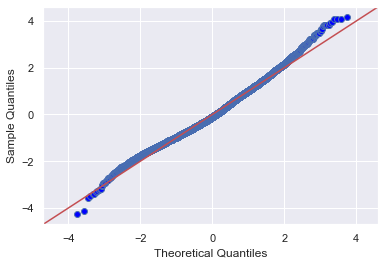

In [116]:
fig = sm.graphics.qqplot(model.resid, dist=stats.norm, line='45', fit=True)

>There is no changes in the qqplot

### Homoscedasiticity

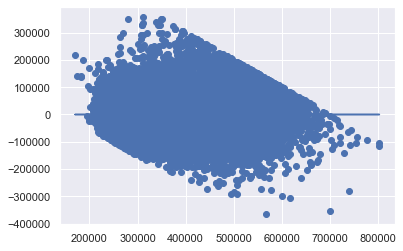

In [117]:
plt.scatter(model.predict(data[x_cols]), model.resid)
plt.plot(model.predict(data[x_cols]), [0 for i in range(len(data))]);

> There is barely a change in the homoscedasiticity graph from the last. Not enough to be able to tell

## Fourth Model  - Transformation

### adding log values to 'continuous' columns

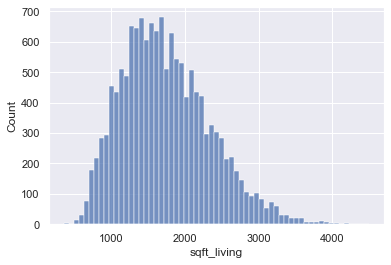

In [118]:
#taking a look at the original 'sqft_living' column
sns.histplot(data = df_model, x = 'sqft_living');

In [119]:
#preforming a log transmation on the 'sqft_living' column
df_model['sqft_living_log'] = np.log(df_model['sqft_living'])

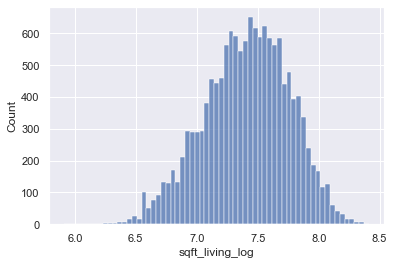

In [120]:
#taking a look at the new log transfomation of the 'sqft_living'
sns.histplot(data = df_model, x = 'sqft_living_log');

In [121]:
#Replacing the original 'sqft_living' in the dataset with the log transform version
x_cols.remove('sqft_living')
x_cols.append('sqft_living_log')

df_model.drop('sqft_living', axis=1, inplace=True)

### Train-Test Split

In [122]:
y = df_model['price']
X = df_model.drop(['price'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = (123))

In [123]:
X_train.columns

Index(['bedrooms', 'bathrooms', 'floors', 'yr_built', 'has_basement',
       'zipcode_type_cheap_low_volume', 'zipcode_type_expensive_high_volume',
       'zipcode_type_expensive_low_volume', 'sqft_living_log'],
      dtype='object')

In [124]:
linreg.fit(X_train, y_train)

y_hat_train = linreg.predict(X_train)
y_hat_test = linreg.predict(X_test)

In [125]:
rmse_train = np.sqrt(mean_squared_error(y_train, y_hat_train))
rmse_test = np.sqrt(mean_squared_error(y_test, y_hat_test))

In [126]:
print("RMSE Train:", round(rmse_train, 2))
print("RMSE Test:", round(rmse_test, 2))

RMSE Train: 86575.85
RMSE Test: 87267.98


### model

In [127]:
data = pd.concat([X_train, y_train], axis = 1)

predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model = ols(formula=formula, data = data).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.595
Model:                            OLS   Adj. R-squared:                  0.595
Method:                 Least Squares   F-statistic:                     1864.
Date:                Wed, 25 Nov 2020   Prob (F-statistic):               0.00
Time:                        14:30:15   Log-Likelihood:            -1.4593e+05
No. Observations:               11412   AIC:                         2.919e+05
Df Residuals:                   11402   BIC:                         2.920e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
Intercept                           7.597e+05    7.8e+04      9.744      0.000    6.07e+05    9.13e+05
bedrooms                           -1.237e+04   1319.747     -9.376      0.000    -1.5e+04   -9786.532
bathrooms                           1.746e+04   2139.581      8.160      0.000    1.33e+04    2.17e+04
floors                               2.16e+04   2070.644     10.433      0.000    1.75e+04    2.57e+04
yr_built                            -887.3959     38.853    -22.840      0.000    -963.554    -811.238
has_basement                        1.013e+04   1934.466      5.238      0.000    6341.082    1.39e+04
zipcode_type_cheap_low_volume      -3.209e+04   2056.009    -15.610      0.000   -3.61e+04   -2.81e+04
zipcode_type_expensive_high_volume  1.495e+05   2994.870     49.932      0.000    1.44e+05    1.55e+05
zipcode_type_expensive_low_volume   1.475e+05   2239.969     65.830      0.000    1.43e+05    1.52e+05
sqft_living_log                     1.782e+05   3781.524     47.134      0.000    1.71e+05    1.86e+05
==============================================================================
Omnibus:                      285.582   Durbin-Watson:                   2.025
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              309.668
Skew:                           0.383   Prob(JB):                     5.71e-68
Kurtosis:                       3.256   Cond. No.                     1.90e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.9e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

> The R-squared decrease ever so slightly from 0.605 to 0.598 and no new changes in the p-values

### QQ Plot

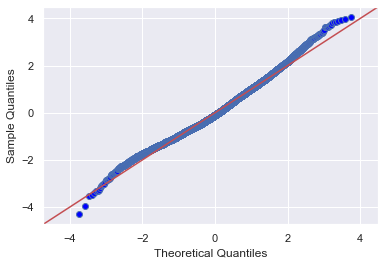

In [128]:
fig = sm.graphics.qqplot(model.resid, dist=stats.norm, line='45', fit=True)

>The qqplot is slightly better than the last, this is currently the best one
we have yet

###  Homoscedasiticity

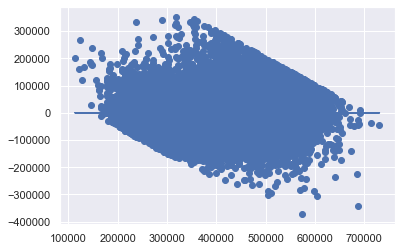

In [129]:
plt.scatter(model.predict(data[x_cols]), model.resid)
plt.plot(model.predict(data[x_cols]), [0 for i in range(len(data))]);

>It's difficult to tell if there is any improvement to the homoscedasiticity

## Predictive Function

>We created a function where we can enter the features value number and it will return the predictive price based on our modify dataset

In [130]:
def King_County_Predicting_Price(bedrooms, bathrooms, floors, yr_built, has_basement, zipcode, sqft_living):
    
    cheap_low_volume = 0
    expensive_high_volume = 0
    expensive_low_volume = 0
    
    zip_type = get_zipcode_category(zipcode)
    
    if zip_type == 'cheap_low_volume':
        cheap_low_volume = 1
    elif zip_type == 'expensive_high_volume':
        expensive_high_volume = 1
    elif zip_type == 'expensive_low_volume':
        expensive_low_volume = 1
        
    predicted_price = linreg.predict(np.array([bedrooms, bathrooms,
                                               floors, yr_built, has_basement,
                                               cheap_low_volume, expensive_high_volume,
                                               expensive_low_volume, np.log(sqft_living)])
                                     .reshape(1, -1))[0]
    
    return "$ {:,}".format(round(predicted_price))

In [131]:
bedrooms = 3
bathrooms = 2
floors = 1
yr_built = 2005
has_basement = 0
zipcode = 98178
sqft_living = 1200

print(King_County_Predicting_Price(bedrooms, bathrooms, floors, yr_built, has_basement, zipcode, sqft_living))

$ 231,537.0


## Conclusion